In [1]:
# Reading the given data
import pandas as pd

Influencer_details=pd.read_excel("Influencer.xlsx")
Influencer_details.head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


In [2]:
# Datas information
Influencer_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [3]:
# Converting million , billion and thousands into number formate
# adding it into the new columns
multipliers = {'k':1000, 'm':1000000,'b':10000000}

Influencer_details["Average_Likes"] = [(int(float(ch[:-1]) * (multipliers[ch[-1]]))) for ch in Influencer_details["Avg. Likes"]]
Influencer_details["Followers_count"] = [(int(float(ch[:-1]) * (multipliers[ch[-1]]))) for ch in Influencer_details["Followers"]]
Influencer_details["Posts_count"] = [int(ch) if type(ch) == int else (int(float(ch[:-1]) * (multipliers[ch[-1]]))) for ch in Influencer_details["Posts"]]
Influencer_details["NewPost_AvgLikes"] = [int(ch) if type(ch) == int else (int(float(ch[:-1]) * (multipliers[ch[-1]]))) for ch in Influencer_details["New Post Avg. Likes"]]
Influencer_details["Total_Likes"] = [(int(float(ch[:-1]) * (multipliers[ch[-1]]))) for ch in Influencer_details["Total Likes"]]

# Dropping the previous columns
Influencer_details.drop(['Avg. Likes', 'Followers', 'Posts', 'New Post Avg. Likes', 'Total Likes'], axis=1, inplace=True)


# Removing "\n" 
Influencer_details["Channel_Info"] =[str(ch) if type(ch) == int else ch.replace('\n','') for ch in Influencer_details["Channel Info"]]
# adding it into the new columns
Influencer_details.drop('Channel Info', axis=1, inplace=True)
# Capitalizing the names
Influencer_details["Channel_Info"] = Influencer_details["Channel_Info"].str.capitalize()

In [4]:
Influencer_details

,Rank,Influence Score,60-Day Eng Rate,Country Or Region,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes,Channel_Info
0,1,92,0.013,Spain,8700000,485200000,3400,6300000,291000000,Cristiano
1,2,91,0.014,United States,8199999,370700000,7000,5000000,574000000,Kyliejenner
2,3,90,0.010,NaN,6700000,363900000,915,3500000,61000000,Leomessi
3,4,93,0.005,United States,6100000,348800000,1900,1700000,114000000,Selenagomez
4,5,91,0.003,United States,1800000,339400000,6800,932000,126000000,Therock
...,...,...,...,...,...,...,...,...,...,...
195,196,63,0.009,Russia,680600,33600000,4600,305700,31000000,Khabib_nurmagomedov
196,197,84,0.064,Canada,2200000,33600000,1400,2100000,30000000,Danbilzerian
197,198,80,0.003,Indonesia,227800,33600000,4200,103200,955900000,Raisa6690
198,199,79,0.003,Brazil,193300,33500000,865,82600,167200000,Luansantana


# 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.


In [5]:
Influencer_details.corr()

,Rank,Influence Score,60-Day Eng Rate,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes
Rank,1.000000,-0.354843,0.028900,-0.277699,-0.698193,-0.058132,-0.272323,0.215522
Influence Score,-0.354843,1.000000,-0.072460,0.048502,0.365428,0.168287,0.040011,0.005137
60-Day Eng Rate,0.028900,-0.072460,1.000000,0.789359,-0.107439,-0.334047,0.866293,-0.043224
Average_Likes,-0.277699,0.048502,0.789359,1.000000,0.346829,-0.348795,0.892784,-0.040609
Followers_count,-0.698193,0.365428,-0.107439,0.346829,1.000000,0.069171,0.260764,-0.069129
Posts_count,-0.058132,0.168287,-0.334047,-0.348795,0.069171,1.000000,-0.285154,-0.175448
NewPost_AvgLikes,-0.272323,0.040011,0.866293,0.892784,0.260764,-0.285154,1.000000,-0.063678
Total_Likes,0.215522,0.005137,-0.043224,-0.040609,-0.069129,-0.175448,-0.063678,1.000000


In [6]:
# These are the TOP FIVE Pairs of Features has Highly correlated to each other

pair_1 = Influencer_details[["Average_Likes","NewPost_AvgLikes"]]
print(pair_1.corr())

print("\npair_1 Average_Likes and NewPost_AvgLikes is First Highly Correlated each other there correlated score is : 0.892784")

                  Average_Likes  NewPost_AvgLikes
Average_Likes          1.000000          0.892784
NewPost_AvgLikes       0.892784          1.000000

pair_1 Average_Likes and NewPost_AvgLikes is First Highly Correlated each other there correlated score is : 0.892784


In [7]:
pair_2 = Influencer_details[["60-Day Eng Rate","NewPost_AvgLikes"]]
print(pair_2.corr())

print("\npair_2 60-Day Eng Rate and NewPost_AvgLikes is Second Highly Correlated each other there correlated score is : 0.866293")

                  60-Day Eng Rate  NewPost_AvgLikes
60-Day Eng Rate          1.000000          0.866293
NewPost_AvgLikes         0.866293          1.000000

pair_2 60-Day Eng Rate and NewPost_AvgLikes is Second Highly Correlated each other there correlated score is : 0.866293


In [8]:
pair_3 = Influencer_details[["Average_Likes","60-Day Eng Rate"]]
print(pair_3.corr())

print("\npair_3 Average_Likes and 60-Day Eng Rate is Third Highly Correlated each other there correlated score is : 0.789359")

                 Average_Likes  60-Day Eng Rate
Average_Likes         1.000000         0.789359
60-Day Eng Rate       0.789359         1.000000

pair_3 Average_Likes and 60-Day Eng Rate is Third Highly Correlated each other there correlated score is : 0.789359


In [9]:
pair_4 = Influencer_details[["Followers_count","Rank"]]
print(pair_4.corr())

print("\npair_4 Followers_count and Rank is Fourth Highly Negative Correlated each other there correlated score is : -0.698193")

                 Followers_count      Rank
Followers_count         1.000000 -0.698193
Rank                   -0.698193  1.000000

pair_4 Followers_count and Rank is Fourth Highly Negative Correlated each other there correlated score is : -0.698193


In [10]:
pair_5 = Influencer_details[["Influence Score","Followers_count"]]
print(pair_5.corr())

print("\npair_5 Influence Score and Followers_count is Fifth Highly Correlated each other there correlated score is : 0.365428")

                 Influence Score  Followers_count
Influence Score         1.000000         0.365428
Followers_count         0.365428         1.000000

pair_5 Influence Score and Followers_count is Fifth Highly Correlated each other there correlated score is : 0.365428


#  2. What is the frequency distribution of the following features?
# ○ Influence Score
# ○ Followers
# ○ Posts

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Influence Score Frequency Rate')

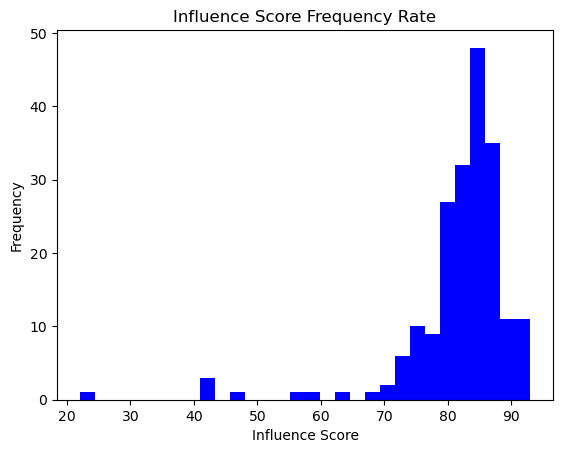

In [12]:
# frequency distribution of the Influence Score

plt.hist(Influencer_details["Influence Score"],bins = 30, color ="blue")

plt.xlabel("Influence Score")
plt.ylabel("Frequency")
plt.title("Influence Score Frequency Rate")

Text(0.5, 1.0, 'Followers_count Frequency Rate')

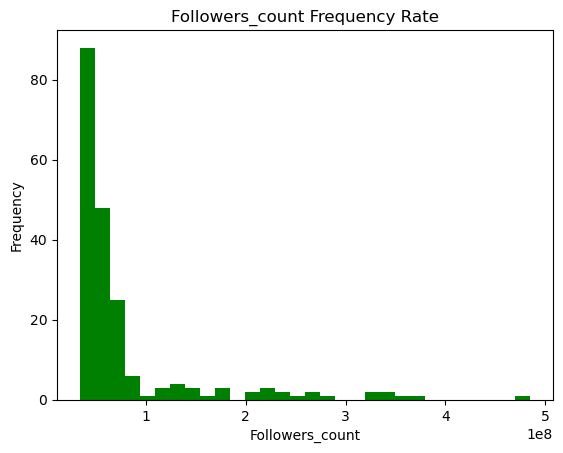

In [13]:
# frequency distribution of the Followers_count

plt.hist(Influencer_details["Followers_count"],bins = 30, color ="green")

plt.xlabel("Followers_count")
plt.ylabel("Frequency")
plt.title("Followers_count Frequency Rate")

Text(0.5, 1.0, 'Posts_count Frequency Rate')

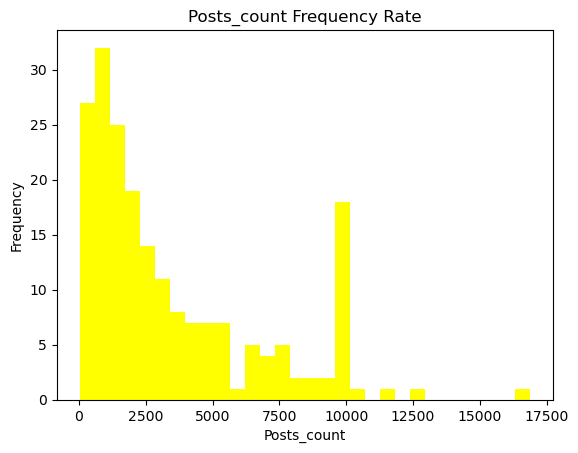

In [14]:
# frequency distribution of the Followers_count

plt.hist(Influencer_details["Posts_count"],bins = 30, color ="yellow")

plt.xlabel("Posts_count")
plt.ylabel("Frequency")
plt.title("Posts_count Frequency Rate")

# 3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.


In [15]:
Influencer_details

,Rank,Influence Score,60-Day Eng Rate,Country Or Region,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes,Channel_Info
0,1,92,0.013,Spain,8700000,485200000,3400,6300000,291000000,Cristiano
1,2,91,0.014,United States,8199999,370700000,7000,5000000,574000000,Kyliejenner
2,3,90,0.010,NaN,6700000,363900000,915,3500000,61000000,Leomessi
3,4,93,0.005,United States,6100000,348800000,1900,1700000,114000000,Selenagomez
4,5,91,0.003,United States,1800000,339400000,6800,932000,126000000,Therock
...,...,...,...,...,...,...,...,...,...,...
195,196,63,0.009,Russia,680600,33600000,4600,305700,31000000,Khabib_nurmagomedov
196,197,84,0.064,Canada,2200000,33600000,1400,2100000,30000000,Danbilzerian
197,198,80,0.003,Indonesia,227800,33600000,4200,103200,955900000,Raisa6690
198,199,79,0.003,Brazil,193300,33500000,865,82600,167200000,Luansantana


In [16]:
# For finding exactly how many null values in Country Or Region column
print("Null Values in the Country or Region Column\n")
print(Influencer_details.isna().sum(),"\n")
print("----------------------------------------------------------")
print("\nDifferent type of Country or Region in the Column\n")
print(Influencer_details["Country Or Region"].value_counts(),"\n")
print("----------------------------------------------------------")
print("\nMost Frequent Value in the Country or Region Column\n")
print(Influencer_details["Country Or Region"].mode(),"\n")

Null Values in the Country or Region Column

Rank                  0
Influence Score       0
60-Day Eng Rate       0
Country Or Region    63
Average_Likes         0
Followers_count       0
Posts_count           0
NewPost_AvgLikes      0
Total_Likes           0
Channel_Info          0
dtype: int64 

----------------------------------------------------------

Different type of Country or Region in the Column

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Ri

In [17]:
# Filling NAN Values with Most Frequent value.

Influencer_details["Country Or Region"] = Influencer_details["Country Or Region"].fillna("United States")
Influencer_details

,Rank,Influence Score,60-Day Eng Rate,Country Or Region,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes,Channel_Info
0,1,92,0.013,Spain,8700000,485200000,3400,6300000,291000000,Cristiano
1,2,91,0.014,United States,8199999,370700000,7000,5000000,574000000,Kyliejenner
2,3,90,0.010,United States,6700000,363900000,915,3500000,61000000,Leomessi
3,4,93,0.005,United States,6100000,348800000,1900,1700000,114000000,Selenagomez
4,5,91,0.003,United States,1800000,339400000,6800,932000,126000000,Therock
...,...,...,...,...,...,...,...,...,...,...
195,196,63,0.009,Russia,680600,33600000,4600,305700,31000000,Khabib_nurmagomedov
196,197,84,0.064,Canada,2200000,33600000,1400,2100000,30000000,Danbilzerian
197,198,80,0.003,Indonesia,227800,33600000,4200,103200,955900000,Raisa6690
198,199,79,0.003,Brazil,193300,33500000,865,82600,167200000,Luansantana


In [18]:
# To view State wise Population according to their Religion
Influencer_details_CountryWise = Influencer_details.groupby("Country Or Region")["Channel_Info"].count()

# Converting into a DataFrame
Influencer_details_CountryWise = pd.DataFrame({'Country':Influencer_details_CountryWise.index.tolist(),'Influencer_Counts':Influencer_details_CountryWise.values.tolist()})

# Sorting Decending by the Influencer Counts
Influencer_details_CountryWise = Influencer_details_CountryWise.sort_values(by=['Influencer_Counts'], ascending=[False])
Influencer_details_CountryWise

,Country,Influencer_Counts
23,United States,128
2,Brazil,13
10,India,12
11,Indonesia,7
8,France,6
17,Spain,5
22,United Kingdom,4
4,Canada,3
5,Colombia,3
20,Turkey,2


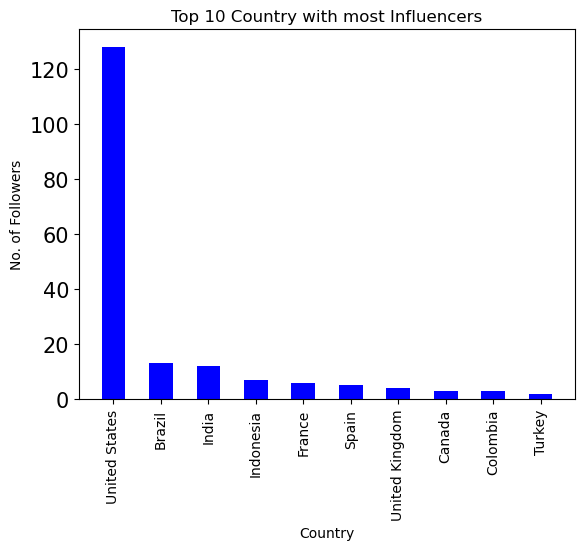

In [19]:
# Based on Followers

plt.bar(Influencer_details_CountryWise['Country'].head(10),Influencer_details_CountryWise['Influencer_Counts'].head(10), color ='blue',width = 0.5)
 
plt.xlabel("Country")
plt.xticks(rotation="vertical",size=10) 
plt.yticks(size=15) 
plt.ylabel("No. of Followers")
plt.title("Top 10 Country with most Influencers")
plt.show()

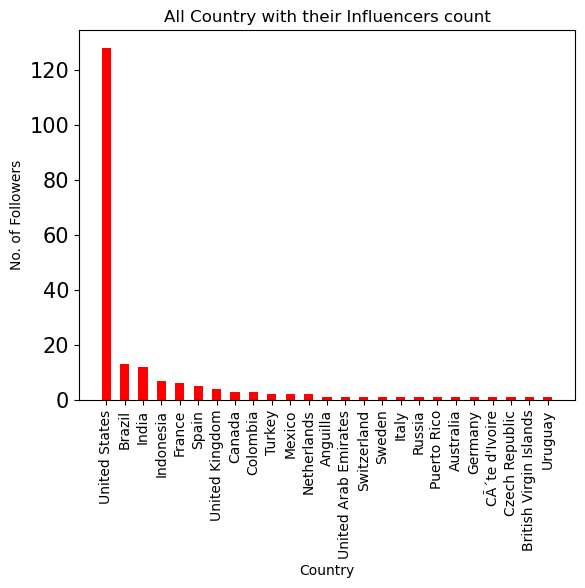

In [20]:
# Based on Followers

plt.bar(Influencer_details_CountryWise['Country'],Influencer_details_CountryWise['Influencer_Counts'], color ='red',width = 0.5)
 
plt.xlabel("Country")
plt.xticks(rotation="vertical",size=10) 
plt.yticks(size=15) 
plt.ylabel("No. of Followers")
plt.title("All Country with their Influencers count")
plt.show()

# 4. Who are the top 10 influencers in the given dataset based on the following features
# ● Followers
# ● Average likes
# ● Total Likes


In [21]:
Influencer_details

,Rank,Influence Score,60-Day Eng Rate,Country Or Region,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes,Channel_Info
0,1,92,0.013,Spain,8700000,485200000,3400,6300000,291000000,Cristiano
1,2,91,0.014,United States,8199999,370700000,7000,5000000,574000000,Kyliejenner
2,3,90,0.010,United States,6700000,363900000,915,3500000,61000000,Leomessi
3,4,93,0.005,United States,6100000,348800000,1900,1700000,114000000,Selenagomez
4,5,91,0.003,United States,1800000,339400000,6800,932000,126000000,Therock
...,...,...,...,...,...,...,...,...,...,...
195,196,63,0.009,Russia,680600,33600000,4600,305700,31000000,Khabib_nurmagomedov
196,197,84,0.064,Canada,2200000,33600000,1400,2100000,30000000,Danbilzerian
197,198,80,0.003,Indonesia,227800,33600000,4200,103200,955900000,Raisa6690
198,199,79,0.003,Brazil,193300,33500000,865,82600,167200000,Luansantana


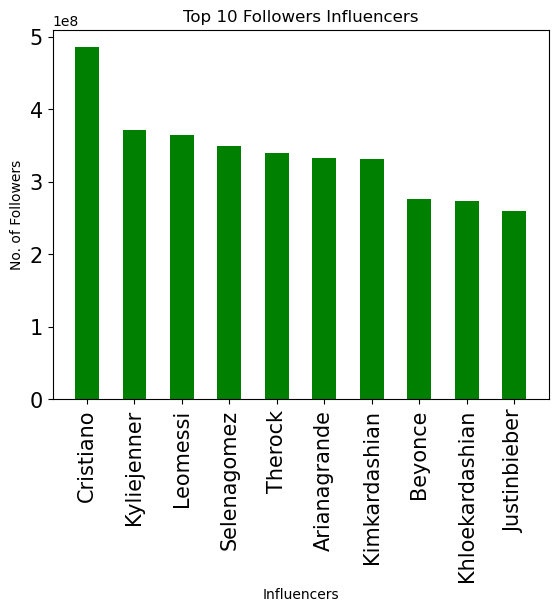

In [22]:
# Based on Followers

top_10_Followers_influencers = Influencer_details[["Followers_count","Channel_Info"]]

plt.bar(top_10_Followers_influencers['Channel_Info'].head(10),top_10_Followers_influencers['Followers_count'].head(10), color ='green',width = 0.5)
 
plt.xlabel("Influencers")
plt.xticks(rotation="vertical",size=15) 
plt.yticks(size=15) 
plt.ylabel("No. of Followers")
plt.title("Top 10 Followers Influencers")
plt.show()

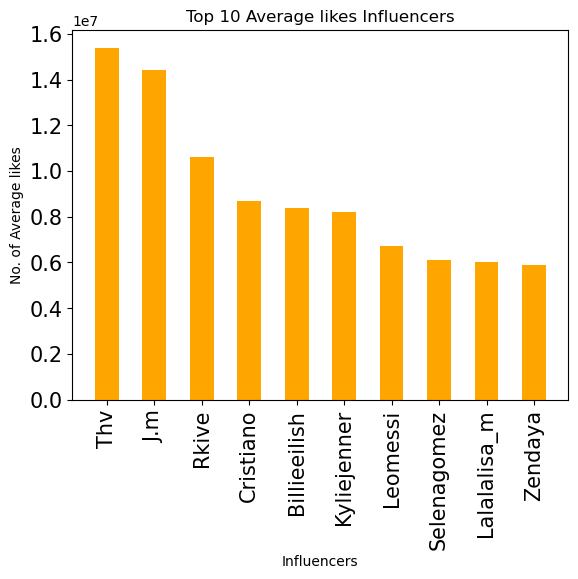

In [23]:
# Based on Average likes

top_10_Average_likes_influencers = Influencer_details[["Average_Likes","Channel_Info"]]
top_10_Average_likes_influencers = top_10_Average_likes_influencers.sort_values(by=['Average_Likes'], ascending=[False])

plt.bar(top_10_Average_likes_influencers['Channel_Info'].head(10) , top_10_Average_likes_influencers['Average_Likes'].head(10) , color ='orange', width = 0.5)
 
plt.xlabel("Influencers")
plt.xticks(rotation="vertical",size=15) 
plt.yticks(size=15) 
plt.ylabel("No. of Average likes")
plt.title("Top 10 Average likes Influencers")
plt.show()

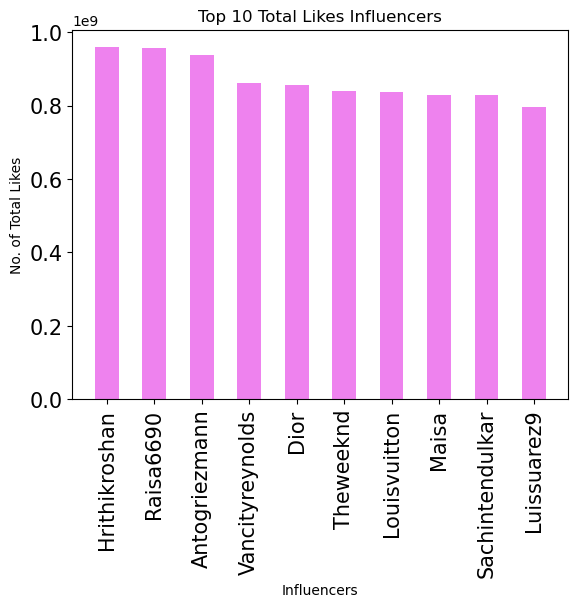

In [24]:
# Based on Total Likes

top_10_Total_Likes_influencers = Influencer_details[["Total_Likes","Channel_Info"]]
top_10_Total_Likes_influencers = top_10_Total_Likes_influencers.sort_values(by=['Total_Likes'], ascending=[False])

plt.bar(top_10_Total_Likes_influencers['Channel_Info'].head(10) , top_10_Total_Likes_influencers['Total_Likes'].head(10) , color ='violet', width = 0.5)
 
plt.xlabel("Influencers")
plt.xticks(rotation="vertical",size=15) 
plt.yticks(size=15) 
plt.ylabel("No. of Total Likes")
plt.title("Top 10 Total Likes Influencers")
plt.show()

# 5. Describe the relationship between the following pairs of features using a suitable graph
# ● Followers and Total Likes
# ● Followers and Influence Score
# ● Posts and Average likes
# ● Posts and Influence Score

In [25]:
Influencer_details

,Rank,Influence Score,60-Day Eng Rate,Country Or Region,Average_Likes,Followers_count,Posts_count,NewPost_AvgLikes,Total_Likes,Channel_Info
0,1,92,0.013,Spain,8700000,485200000,3400,6300000,291000000,Cristiano
1,2,91,0.014,United States,8199999,370700000,7000,5000000,574000000,Kyliejenner
2,3,90,0.010,United States,6700000,363900000,915,3500000,61000000,Leomessi
3,4,93,0.005,United States,6100000,348800000,1900,1700000,114000000,Selenagomez
4,5,91,0.003,United States,1800000,339400000,6800,932000,126000000,Therock
...,...,...,...,...,...,...,...,...,...,...
195,196,63,0.009,Russia,680600,33600000,4600,305700,31000000,Khabib_nurmagomedov
196,197,84,0.064,Canada,2200000,33600000,1400,2100000,30000000,Danbilzerian
197,198,80,0.003,Indonesia,227800,33600000,4200,103200,955900000,Raisa6690
198,199,79,0.003,Brazil,193300,33500000,865,82600,167200000,Luansantana


Text(0.5, 1.0, 'Followers Vs Total Likes')

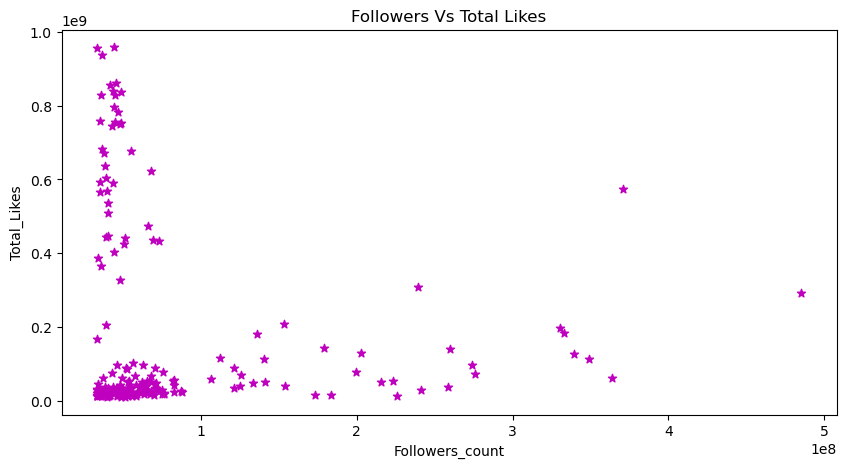

In [26]:
# Followers and Total Likes

# Continous vs Continous is better explained using Scatter plot
# Scatter Plot
X = Influencer_details["Followers_count"]
Y = Influencer_details["Total_Likes"]

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X , Y , c = 'm' , marker = '*')

# Defining Title and X and Y Axis
plt.xlabel ("Followers_count")
plt.ylabel ("Total_Likes")
plt.title("Followers Vs Total Likes")

Text(0.5, 1.0, 'Followers Vs Influence Score')

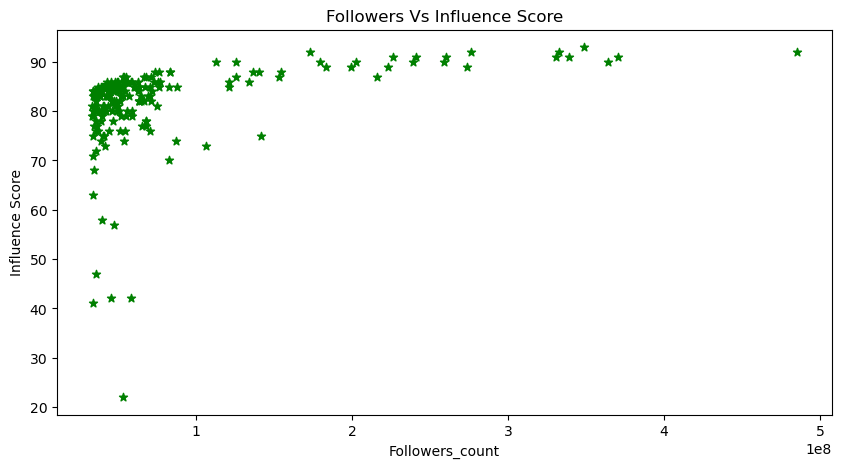

In [27]:
# Followers and Influence Score

# Continous vs Continous is better explained using Scatter plot
# Scatter Plot
X = Influencer_details["Followers_count"]
Y = Influencer_details["Influence Score"]

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X , Y , c = 'g' , marker = '*')

# Defining Title and X and Y Axis
plt.xlabel ("Followers_count")
plt.ylabel ("Influence Score")
plt.title("Followers Vs Influence Score")

Text(0.5, 1.0, 'Posts Vs Average likes')

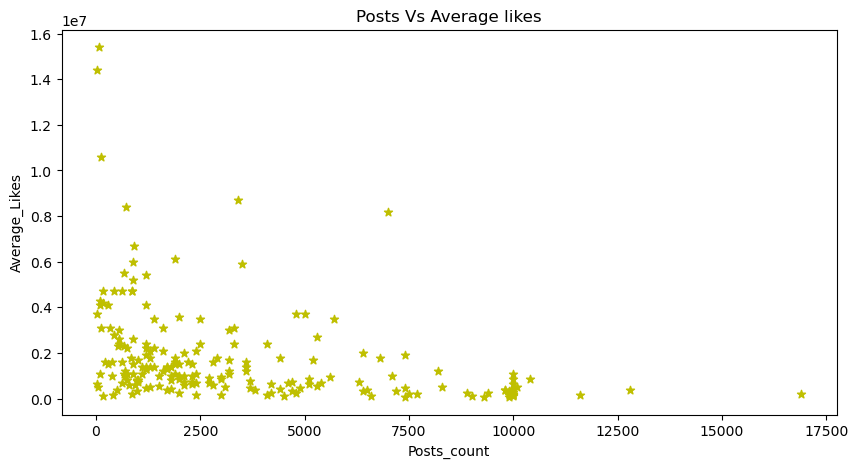

In [28]:
# Posts and Average likes

# Continous vs Continous is better explained using Scatter plot
# Scatter Plot
X = Influencer_details["Posts_count"]
Y = Influencer_details["Average_Likes"]

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X , Y , c = 'y' , marker = '*')

# Defining Title and X and Y Axis
plt.xlabel ("Posts_count")
plt.ylabel ("Average_Likes")
plt.title("Posts Vs Average likes")

Text(0.5, 1.0, 'Posts Vs Influence Score')

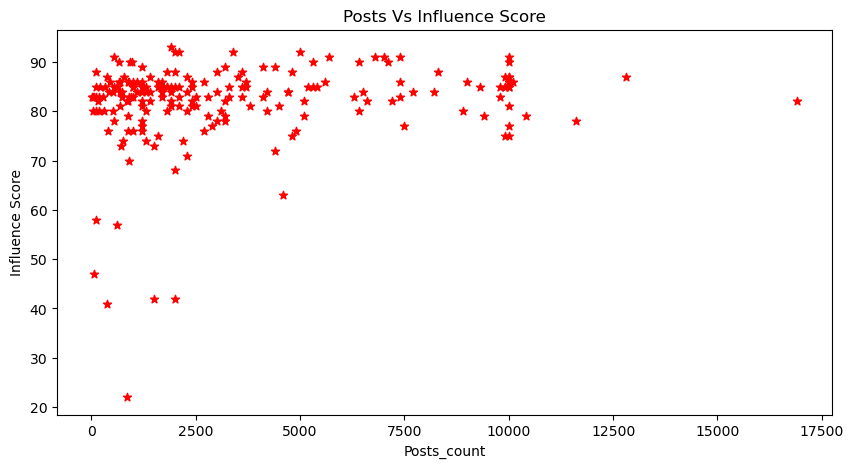

In [29]:
# Posts and Influence Score

# Continous vs Continous is better explained using Scatter plot
# Scatter Plot
X = Influencer_details["Posts_count"]
Y = Influencer_details["Influence Score"]

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X , Y , c = 'r' , marker = '*')

# Defining Title and X and Y Axis
plt.xlabel ("Posts_count")
plt.ylabel ("Influence Score")
plt.title("Posts Vs Influence Score")